# SPAMS

Search for Planets Around post-Main Sequence stars

## Introduction

Welcome to SPAMS! I'm sorry for not being here in this first week, hopefully these tutorials will keep you busy in the mean time. I return on Wednesday November 11, and I expect everything in this notebook to be completed by then. Some of the notebook covers tutorials for the software, which you should do with the other SPAMS team members. Please sit together and help one another -- we're not competing, we're a team! 

The section below has a bunch of readings for you to complete. Each reading comes with a brief writing request which I expect you to share with me (more specific instructions below). Be sure to complete both the readings and tutorials before I return!


## Reading

Below this section we're going to do a tutorial of some of the code that you'll be using, but before we get to that, I'm going to describe reading assignments for you to do during each class session or at home if you can't finish in class. Don't forget to do these and to share your Google Doc of questions with me (my email address is bmmorris@uw.edu).

### Monday (due Wednesday)

There have been developements in the field since you've joined the project. Last week, a team looking for planets with the revived Kepler space telescope found a disintegrating planet orbiting a white dwarf just like the ones that we're hunting for. We've been beaten to the punch, but that should only encourage us to push harder on the data that we already have, because now we have proof that these planets are out there! [Follow this link](http://astrobites.org/2015/10/26/dead-star-dying-planets/) and please read the astrobites summary of the article announcing the discovery.

Then, I want you to actually read [the original paper published in the scientific journal *Nature*](http://www.nature.com/nature/journal/v526/n7574/full/nature15527.html). This will be hard, but I know you can get through it. A lot of the words in this article are words you do not know yet, and I'm giving you this challenge to take stock of what I can teach you. Open up a Google Doc and take note of the words you don't know or questions you have about the paper - I expect you to have lots. When I return, we can go over what you don't know so you'll be a few steps closer to being an expert in this newly developing field.

If this feels like a difficult task, that's because it is! But this is good practice for research in any field -- knowing what you don't know and then learning how to find that stuff out is an important skill to build. **Please share your Google Doc with me once you've made it.**

### Wednesday (due Friday)

One of the motivations for the work that we're doing is to learn about the interiors of planets, since the metal-polluted white dwarfs are polluted by metals that were once planets. If we measure the abundances of those metals relative to one another, we can learn about the bulk composition of the planet that fell onto the star. This is cool because we can't see the insides of planets in virtually any other way. Please read [this astrobites article on what we can learn from these dead planets](http://astrobites.org/2014/11/17/exploring-the-planetary-graveyard/), which is the primary reason why I think this project is important.  

Also please read [this very short, three page paper](http://arxiv.org/pdf/1505.03142v1.pdf) that was posted in May summarizing how studies of metal-polluted white dwarfs can be used to probe the bulk properties of planets in the next 20 years. 

Every 10 years in astronomy, a panel of astronomers is assembled that lays out the priorities for the field over the coming decade, called the Decadal Survey. They then release a book on the consensus they reach on which topics should be our top priorities on long term, impactful projects that require a lot of funding. This is one of the ways astronomers try to manage our requests from Congress, by saying that we as a field have prioritized certain goals. The astronomers who wrote this paper think studying metal-polluted white dwarfs should be part of the conversation.

As you read these two papers, add to the Google Doc from Monday and add new words you'd like defined or techniques you'd like explained. Give me lots to explain - I want to answer all of your questions!

### Friday (due Monday)



## Working with the data

The tutorial below shows how to use some of the code that we'll be working with. I'm developing this code as the project grows, so some of the tools might not work perfectly but I'll fix things as we break them.

There are a combination of tutorials and readings for you to go through in this notebook which I expect to be completed when I return on Wednesday, Nov 11. I've asked for you to do some writing on the reading assignments, so 

### Opening images: DS9

If we were to find anything strange in a light curve, before we jump to the conclusion that we've discovered a planet, we would need to open up the raw images and see if they look OK. Sometimes the quirks in the detector can give us data that look exciting, but only turn out to be artifacts. So let's practice opening the raw images.

The images that we take are stored in a format called `FITS` (rather than JPG or PNG, for example). This format basically stores an array - the image - and a bunch of metadata, like the time that the image was taken, where in the sky you were looking, etc. To open FITS images, we need to use a program called DS9. You can open DS9 from your UNIX terminal by typing `ds9`. Open up DS9 and follow along with [this tutorial](http://astrobites.org/2011/03/09/how-to-use-sao-ds9-to-examine-astronomical-images/) to get to know how to handle our images.

After you're done with the tutorial from astrobites, try opening an image that Doug Branton and I took in August, which is stored at this path: 
```
/astro/users/bmmorris/SPAMS/WD1935+276_B_20150807_032315corrected.fits
```
In this image, we were studying the white dwarf called WD 1935+276. Put that name into the astronomical database [SIMBAD](http://simbad.cfa.harvard.edu/simbad/sim-fid) and take a look at the entry for our star. There are coordinates for our target on the line of the data table that starts with `ICRS`. Look for those coordinates in the data image, and see if you can figure out which star in the image is the white dwarf we should be studying. 

Stare at this star pensively for a moment and imagine the doomed worlds that may be spiraling into their fiery, 10,000+ K oblivion. Imagine the civilizations that may have once roamed those worlds of molten rock and dust. Imagine that we're hunting for their final pulse, written in a light curve that only we can hear. 

Now wipe your tears away and move on to the software tutorial.

### `padre`

As mentioned in the Introduction, the software package `padre` has lots of tools for allowing us to get useful science out of our images of the sky. Let's experiment with its features to: open some light curves, explore their contents, and begin to hunt for planets by eye.

Let's download the package, and some notebooks and other resources that we'll use. If you're visiting this notebook for the first time on GitHub, you should clone this git repository and then open the notebook from your terminal, so you can experiment with each cell's contents. Here's how you do that:

**1)** `cd` to change directories into your `Astro192/` directory. When in `Astro192/`, type: 
```
git clone https://github.com/bmorris3/SPAMS.git
```

to get a copy of the `SPAMS` repository. You should see a bunch of text like this: 

```
[bmmorris@astrolab1 Astro192]$ git clone https://github.com/bmorris3/SPAMS.git
Cloning into 'SPAMS'...
remote: Counting objects: 306, done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 306 (delta 0), reused 0 (delta 0), pack-reused 303
Receiving objects: 100% (306/306), 2.84 MiB | 1.46 MiB/s, done.
Resolving deltas: 100% (137/137), done.
Checking connectivity... done.
```

Once that's done, you now have a `SPAMS` directory. `cd` into it. 

**2)** `ls` and look around. There are a lot of files in there. Most of them were made while working with last year's Pre-MAP students to pick the targets that we'd observe. 

**3)** `cd` into the `SPAMS/arcsat` directory. In there, there's a directory called `padre` which is the Photometric ARCSAT Data REduction package that I wrote for us to use. That's the software that takes all of the images from the telescope and turns them into *light curves* (measurements of brightness over time). `cd` into `padre` and `cat` a few of the `*.py` files to check out all of the code in there. Don't panic - I don't expect you to know how any of this works, but I want you to take note that there's just a bunch of commands in there that will look somewhat familiar. Mostly it's working with the images as `numpy` arrays and manipulating them to take measurements. The skills that you're learning in class can be applied to any arbitrarily complicated problem.

**4)** In `SPAMS/arcsat`, there's a notebook called `intro_to_spams`. Use `ipython notebook` to open that notebook. That notebook is this notebook. Once you have that notebook open, you'll be able to following along interactively in the code blocks below. 


### Loading a light curve

A file in the `SPAMS/arcsat` directory called `Wolf1516_bestlc.npz` contains the light curve for a white dwarf called Wolf 1516. This is one of the light curves that we'll be analyzing. The `.npz` format is a type of data file that stores numpy arrays. 

First, we need to import the `LightCurve` object from `padre`. This `LightCurve` object doesn't know anything about the data that we have, it's just a way of holding light curves in Python. Imagine it like an organizer -- we can put a light curve into this organizer and then run lots of code on data that have been sorted into the organizer.

In [17]:
%matplotlib inline
# Import matplotlib and numpy like always
import matplotlib.pyplot as plt
import numpy as np


# Import the LightCurve object from padre
from padre import LightCurve

**Remember**: You can only import `padre` when you're in this directory.

Now we need to load a specific light curve into the `LightCurve` object, and give it a variable name.

In [13]:
wolf1516 = LightCurve.load_from('Wolf1516_bestlc.npz', name='Wolf1516')

The first argument in the `load_from` command is the name of the file to load. The second, `name`, is the name of the white dwarf that we're looking at. 

A light curve, at its most basic level, is a series of flux (brightness) measurements as a function of time. So you might expect that you could get times and fluxes out of this `LightCurve` object, and you can, like this:

In [5]:
# Show the first ten times:
wolf1516.times

<Time object: scale='utc' format='jd' value=[ 2457306.62931713  2457306.62967593  2457306.63001157  2457306.6303588
  2457306.63069444  2457306.63104167  2457306.63137731  2457306.63172454
  2457306.63206018  2457306.63239583  2457306.63274306  2457306.6330787
  2457306.63341435  2457306.63376157  2457306.6341088   2457306.63444444
  2457306.63478009  2457306.63512731  2457306.63547454  2457306.63582176
  2457306.63615741  2457306.63650463  2457306.63684028  2457306.63717593
  2457306.63752315  2457306.6378588   2457306.63820602  2457306.63854167
  2457306.63887731  2457306.63921296  2457306.63956018  2457306.63989583
  2457306.64024306  2457306.64056713  2457306.64091435  2457306.64126157
  2457306.64159722  2457306.64194444  2457306.64229167  2457306.64262731
  2457306.64296296  2457306.64331018  2457306.64365741  2457306.64400463
  2457306.64434028  2457306.64467593  2457306.64502315  2457306.64537037
  2457306.64570602  2457306.64604167  2457306.64637731  2457306.64672454
  2457306

The times stored in the `LightCurve` object are a fancy data type that allows us to do conversions between different time systems. For our work, we'll always be working on the times in a specific format called the Julian Date. Please skim [this entry on what JD is](https://en.wikipedia.org/wiki/Julian_day).

To get the times out as julian dates, we do this: 

In [6]:
wolf1516.times.jd

array([ 2457306.62931713,  2457306.62967593,  2457306.63001157,
        2457306.6303588 ,  2457306.63069444,  2457306.63104167,
        2457306.63137731,  2457306.63172454,  2457306.63206018,
        2457306.63239583,  2457306.63274306,  2457306.6330787 ,
        2457306.63341435,  2457306.63376157,  2457306.6341088 ,
        2457306.63444444,  2457306.63478009,  2457306.63512731,
        2457306.63547454,  2457306.63582176,  2457306.63615741,
        2457306.63650463,  2457306.63684028,  2457306.63717593,
        2457306.63752315,  2457306.6378588 ,  2457306.63820602,
        2457306.63854167,  2457306.63887731,  2457306.63921296,
        2457306.63956018,  2457306.63989583,  2457306.64024306,
        2457306.64056713,  2457306.64091435,  2457306.64126157,
        2457306.64159722,  2457306.64194444,  2457306.64229167,
        2457306.64262731,  2457306.64296296,  2457306.64331018,
        2457306.64365741,  2457306.64400463,  2457306.64434028,
        2457306.64467593,  2457306.64502

and now the output is a numpy array, like the ones we've used all along in class. You can do indexing on these times just like you do with any other numpy array:

In [7]:
# Get the first ten times: 
wolf1516.times.jd[:10]

array([ 2457306.62931713,  2457306.62967593,  2457306.63001157,
        2457306.6303588 ,  2457306.63069444,  2457306.63104167,
        2457306.63137731,  2457306.63172454,  2457306.63206018,
        2457306.63239583])

In [9]:
# Get the min, max of all of the times
wolf1516.times.jd.min(), wolf1516.times.jd.max()

(2457306.6293171295, 2457306.9429629627)

Similary, the fluxes (brightness measurements) are accessible like this:

In [11]:
wolf1516.fluxes

array([ 1.00650327,  1.01375875,  0.99402723,  1.00382665,  1.01578763,
        1.05310722,  1.00414647,  1.01008881,  1.00962537,  0.99425211,
        0.96922525,  0.9963022 ,  0.93149357,  1.00650064,  0.9956468 ,
        0.99823043,  0.96281055,  0.9962827 ,  0.9889316 ,  0.99688417,
        0.98431393,  0.99169714,  0.99996439,  0.97674926,  1.02018514,
        0.98913162,  0.99030087,  1.0052252 ,  0.98945215,  0.98625507,
        1.00490223,  0.96784117,  1.01839196,  0.95811903,  0.99259543,
        0.95887212,  0.98362453,  1.00708841,  1.03192165,  1.02151917,
        0.99956271,  0.98196174,  0.99836181,  1.00069022,  0.98834177,
        0.98057657,  1.00455165,  0.96075393,  0.97656355,  0.99429899,
        0.98956742,  0.98652678,  0.98014047,  0.99236888,  1.01718655,
        0.98772968,  0.97210488,  1.01270602,  0.98982666,  1.03158914,
        0.99969645,  0.99377562,  1.00256705,  0.9886963 ,  1.01421787,
        0.99035175,  0.97717709,  1.02757357,  1.00926539,  1.00

The fluxes are also stored in a numpy array. Notice that most of the values are near `1`. That's because we typically measure fluxes in a fractional sense. We scale the "normal" brightness of the star to one, and then as it varies, it's easy to see by what relative amount the brightness has changed. For example, since the normal brighness is one, we know that if the star dims during a transit down to 0.8, the star has dimmed 20%, which would correspond to a planet roughly 40% the size of the star.

All of these numbers are great, but we want to see the light curve in a plot. Can you guess the command you'd use?

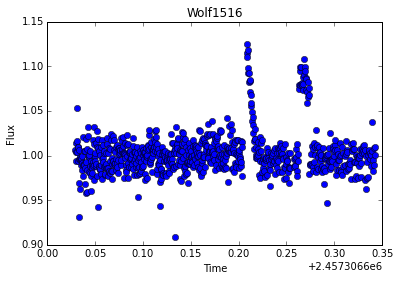

In [16]:
ax = wolf1516.plot()

Let's break down what we're looking at. The typical flux is near 1, like we want it to be. There are a few points that stick outside of the pack, far away from the others - we'd call those outliers. But maybe some of the outliers could be due to planets causing a decrease in the brightness of the star? That's for you to find out later.

There are two positive peaks in the flux, which are *artifacts*. They're due to imperfections in the observing plan that caused the detector to think the star was brighter than it actually was. We'll ignore those spikes in brightness, because they're not real. 

This is a habit that we'll have to form -- when you see data that look interesting, your first instinct should be *not* to trust them, but to be curious how they got that way. Otherwise you'll always think you see a planet. Assume that all data are wrong until shown to be likely not wrong.

#### Interactive plots

Typically, it's more useful to view the light curve plot outside of an ipython notebook, so you can use the zoom and pan tools to interactively get a detailed look at the light curve. Copy and paste the code below (which replicates what we've done above) into an ipython shell (go to Terminal, type `ipython`) to make an interactive plot that you can move around. 

```python
from padre import LightCurve
wolf1516 = LightCurve.load_from('Wolf1516_bestlc.npz', name='Wolf1516')
ax = wolf1516.plot()
```

Zoom in to the points that fall well below the average and see if they have neigbors that are unusually low fluxes also. Single points that fall far away from all of the others are *outliers*, but groups of points that fall at low fluxes could be telling us something more interesting. Do you see any groups of 3-4 consecutive points that are all lower than average?

Probably the best tool for zooming in this way is the Pan/Zoom tool, the button for this tool is a pair of perpendicular arrows (axes). When this button is left clicked, dragging the data will move them around. Right clicking and holding will allow you to stretch the vertical and horizontal axes of the plot. Using the left and right buttons, zoom in on a few different regions of the image, and see if you can find any transits. 

#### megaplot

Now let's say that you have something in this light curve that looks interesting - maybe a transit. Since we're trying very hard to be skeptical, we will try to dig deeper and see if we can find evidence that something is wrong with the data. One way to put the light curve into context is to look at other data. For example, if the code that measures brightness wasn't measuring the brightness of the right star for a few exposures, then of course the brightness will appear to change in our light curve. We'll check that using the *megaplot*. In the `ipython` shell that you were running earlier, run:

```python
ax = wolf1516.megaplot()
```

Now you have more data to look at, to put that light curve into a broader context. The top subplot is the "light curve" that we saw earlier. The middle subplot shows the brightness of every star that we measured in each exposure. Each line of a different color represents the brightness of one star. The black dots represent the brightness of the target star (Wolf 1516). Notice that all of the stars change their brightness throughout the night, and most of them change brightness in similar ways. Those similar trends get removed by `padre` so that we can study Wolf 1516 for the trends that only it exhibits. 

You might notice that the times where the light curve has peaks correspond to times right after gaps in the fluxes in the middle plot (gaps meaning times where there are no brightness measurements). That should make you suspicious of those peaks -- if the peaks only show up after gaps in the data, chances are, they're not due to the intrinsic brightness of the star changing, they're due to whatever caused the detector to stop working for a few exposures.

The bottom three plots show the positions of the stars on the detector throughout the night. The telescope doesn't track motion of the sky perfectly, leading the stars to drift across the camera. The leftmost plot in the bottom row shows the $(x, y)$ pixel positions of each star throughout the night - these coordinates are made just by numbering each row and column of pixels in the images that we get. You can zoom in on this plot to see how the stars glide around. The middle and right plots in the bottom row show the $x$ and $y$ positions of the stars over time. Again, the black points are the positions of Wolf 1516.

### Basic light curve statistics

So we can see our data pretty well now. How can we learn something from it?

One of the first quantities we would want to know is: how big would a planet have to be in order for us to detect it transiting this star? To answer this question, we need to know about geometry. If a planet is the same size of the star and transits right across the middle of it, we would lose all of the light from the star, and the flux would go from one to zero. We call the relative change in flux the depth, often abbreviated lower-case delta, $\delta$. If the planet is the size of an apple, then it wouldn't block very much light at all, and $\delta \rightarrow 0$. 

Since the amount of light that we lose from the star during a transit is equivalent to the ratio of the cross-sectional area of the planet to the cross-sectional area of the star, we can find the depth during transit $\delta$, given that the cross-sectional area of a sphere is $\pi r^2$ for the planet ($R_p$ and star $R_s$):

$$ \delta = \frac{\pi R_p^2}{\pi R_s^2} = \left( \frac{R_p}{R_s} \right)^2 $$

If you know the radius of the star $R_s$ and can measure the depth of the transit from your light curve $\delta$ then you can find the radius of the planet $R_p$!

#### How small a planet could we detect in these data?

Now even if there are no transits in Wolf 1516, we could get an estimate of the smallest planet we could detect from this light curve. The data are scattered around fluxes near one, but not precisely one, which we call *noise* in our data. Lot's of noise looks like very broad scatter about one. To measure how much noise we have in a given light curve, and therefore how big a transit has to be before we can detect it despite the noise, we need to measure how big the scatter is. 

In statistics, there's a calculation called the *standard deviation*, abbreviated $\sigma$ (sigma), which describes the scatter in a set of points. We'll measure the standard deviation of the fluxes in our light curve to measure how spread out the points are. We can use numpy's function for calculating the standard deviation of the fluxes, `wolf1516.fluxes`, like this:

In [18]:
wolf1516.fluxes.std()

0.024198135528383326

This means that there's typically 2.4% scatter in our light curve, i.e. a majority of the fluxes are between 0.976 to 1.024. To be precise, 68% of the points will fall in this range of fluxes. We can check that with a histogram: do most fluxes fall between those two values? 

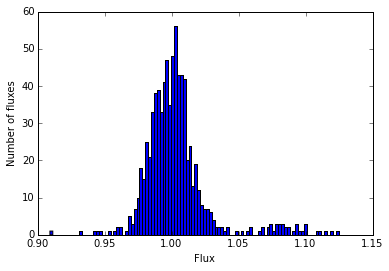

In [21]:
plt.hist(wolf1516.fluxes, bins=100)
plt.xlabel('Flux')
plt.ylabel('Number of fluxes')
plt.show()

Now let's assume that we can measure any transit that's 3$\times$ deeper than the scatter due to noise, so we can identify it definitively amidst the scatter. Let's say that: 

$$ \mathrm{scatter\, due\, to\, noise} \approx \sigma $$

then the smallest transit depth we could measure is: 

$$ 3\sigma = \delta = \left( \frac{R_p}{R_s} \right)^2 $$

$$ \frac{R_p}{R_s} = \sqrt{3\sigma} $$

For Wolf 1516 the minimum ratio of planet-to-star radii is:

In [23]:
np.sqrt(3*wolf1516.fluxes.std())

0.26943349195144611

or we could see a planet as long as it had a radius 26% of the star's or greater. Remember, since a white dwarf is about the size of the Earth: 

$$  \frac{R_p}{R_s} = \sqrt{3\sigma}  $$
$$  \frac{R_p}{R_\oplus}  \approx \sqrt{3\sigma}  $$
$$  R_p  \approx \sqrt{3\sigma} R_\oplus $$

$0.27 R_\oplus$ is a small planet (reminder: $R_\oplus$ is the abbreviation for Earth radii)! For comparison, the radius of the Earth's moon is $0.27 R_\oplus$, so we could just barely detect moon-sized transiting objects in these data.

## Knowing what to look for

When you get a light curve, how will you know what a transit should look like? 

The shape of a transit light curve is determined by the properties of the planet transiting the star. One way to visiualize this is to use [this fun visualization webpage](http://astro.unl.edu/naap/ebs/animations/ebs.html) which demonstrates what eclipsing binary light curves -- two stars orbiting one another -- look like. Of course, we're looking for a planet orbiting a star, but the light curve properties are similar to the eclipsing binary light curves if you set the temperature of one of the stars to the minimum possible temperature (this one represents the planet). 

Experiment and determine: what orbital and viewing properties give you a V-shaped transit light curve with a sharp corner? Which ones give you a U-shaped transit light curve with a flat bottom? Write these down in your Google Doc.